In [ ]:
pip install tensorflow==1.15.5

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
print(tf.__version__)

1.15.5


In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../Data/Digits/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../Data/Digits/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../Data/Digits/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../Data/Digits/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../Data/Digits/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mni

In [5]:
n_train = mnist.train.num_examples
n_validation = mnist.validation.num_examples
n_test = mnist.test.num_examples

In [6]:
n_input = 784
n_hidden_1 = 200
n_output = 10
lr = 0.01
n_iter = 1000
batch_size = 128

In [7]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])

In [8]:
weight = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden_1, n_output], stddev=0.1))
}
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden_1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [9]:
layer_1 = tf.add(tf.matmul(X, weight['w1']) , biases['b1'])
output_layer = tf.add(tf.matmul(tf.nn.relu(layer_1), weight['w2']) , biases['b2'])

In [10]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.MomentumOptimizer(lr, 0.9).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [11]:
correct_pred = tf.equal(tf.arg_max(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [13]:
for i in range(n_iter):
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  sess.run(train_step, feed_dict={X: batch_x, Y: batch_y})

  if i % 100 == 0:
    minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y})
    print(f"Vòng lặp thứ {i + 1}, Loss = {minibatch_loss}, Accuracy = {minibatch_accuracy}")
print("\n\n Last Accuracy:", minibatch_accuracy)

Vòng lặp thứ 1, Loss = 2.5197601318359375, Accuracy = 0.0859375
Vòng lặp thứ 101, Loss = 0.3993052840232849, Accuracy = 0.8828125
Vòng lặp thứ 201, Loss = 0.4330637753009796, Accuracy = 0.90625
Vòng lặp thứ 301, Loss = 0.4116330146789551, Accuracy = 0.890625
Vòng lặp thứ 401, Loss = 0.31829744577407837, Accuracy = 0.890625
Vòng lặp thứ 501, Loss = 0.3234558701515198, Accuracy = 0.8828125
Vòng lặp thứ 601, Loss = 0.22330152988433838, Accuracy = 0.9375
Vòng lặp thứ 701, Loss = 0.16204524040222168, Accuracy = 0.9453125
Vòng lặp thứ 801, Loss = 0.19807058572769165, Accuracy = 0.921875
Vòng lặp thứ 901, Loss = 0.18272531032562256, Accuracy = 0.953125


 Last Accuracy: 0.953125


In [14]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels})
print("Accuracy on test set:", test_accuracy)

Accuracy on test set: 0.938


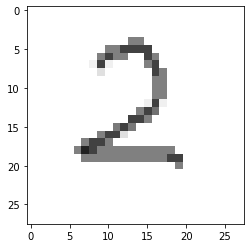

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = Image.open("/content/drive/MyDrive/2021-2022/Pattern_Recognization/Week_1/Data/Digits/test_img.png")
plt.imshow(img)

In [22]:
img = np.invert(img.convert('L')).ravel()
prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [img]})
print("Kết quả nhận diện:", np.squeeze(prediction))

Kết quả nhận diện: 2
